In [1]:
import numpy as np #supporting multi-dimensional arrays and matrices
import os #read or write a file
#import cv2
from skimage import color
import matplotlib.pyplot as plt
from skimage import io
from skimage.transform import resize
import pandas as pd #data manipulation and analysis
from tqdm import tqdm # for  well-established ProgressBar
from random import shuffle #only shuffles the array along the first axis of a multi-dimensional array. The order of sub-arrays is changed but their contents remains the same.
LR = 1e-3
MODEL_NAME = 'FacialEmotionClassification-{}-{}.model'.format(LR, '2conv-basic') # just so we remember which save


In [3]:
data_dir = 'D:\ExpertHub\My_Project\CK+48'
train_dir = os.path.join(data_dir, 'train')
#test_dir = os.path.join(data_dir, 'test')
IMG_SIZE = 48

train = []

CATEGORIES = ['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']
NUM_CATEGORIES = len(CATEGORIES)
print (NUM_CATEGORIES)




7


In [4]:
def label_img(word_label):                       
    if word_label == 'anger': return [1,0,0,0,0,0,0]
    elif word_label == 'contempt': return [0,1,0,0,0,0,0]
    elif word_label == 'disgust': return [0,0,1,0,0,0,0]
    elif word_label == 'fear': return [0,0,0,1,0,0,0]
    elif word_label == 'happy': return [0,0,0,0,1,0,0]
    elif word_label == 'sadness': return [0,0,0,0,0,1,0]
    elif word_label == 'surprise': return [0,0,0,0,0,0,1]
    
    
def create_train_data():
    #train = []
    for category_id, category in enumerate(CATEGORIES):
        for img in tqdm(os.listdir(os.path.join(train_dir, category))):
            label=label_img(category)
            path=os.path.join(train_dir,category,img)
            #img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            #img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
            img = resize(color.rgb2gray(io.imread(path)),(IMG_SIZE,IMG_SIZE))
            train.append([np.array(img),np.array(label)])
    
    shuffle(train)
    return train


train_data = create_train_data()

  0%|                                                                                          | 0/135 [00:00<?, ?it/s]C:\Users\ASUS\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\ASUS\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
100%|███████████████████████████████████████████████████████████████████████████████| 249/249 [00:00<00:00, 265.32it/s]


In [5]:
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y = np.array([i[1] for i in train])


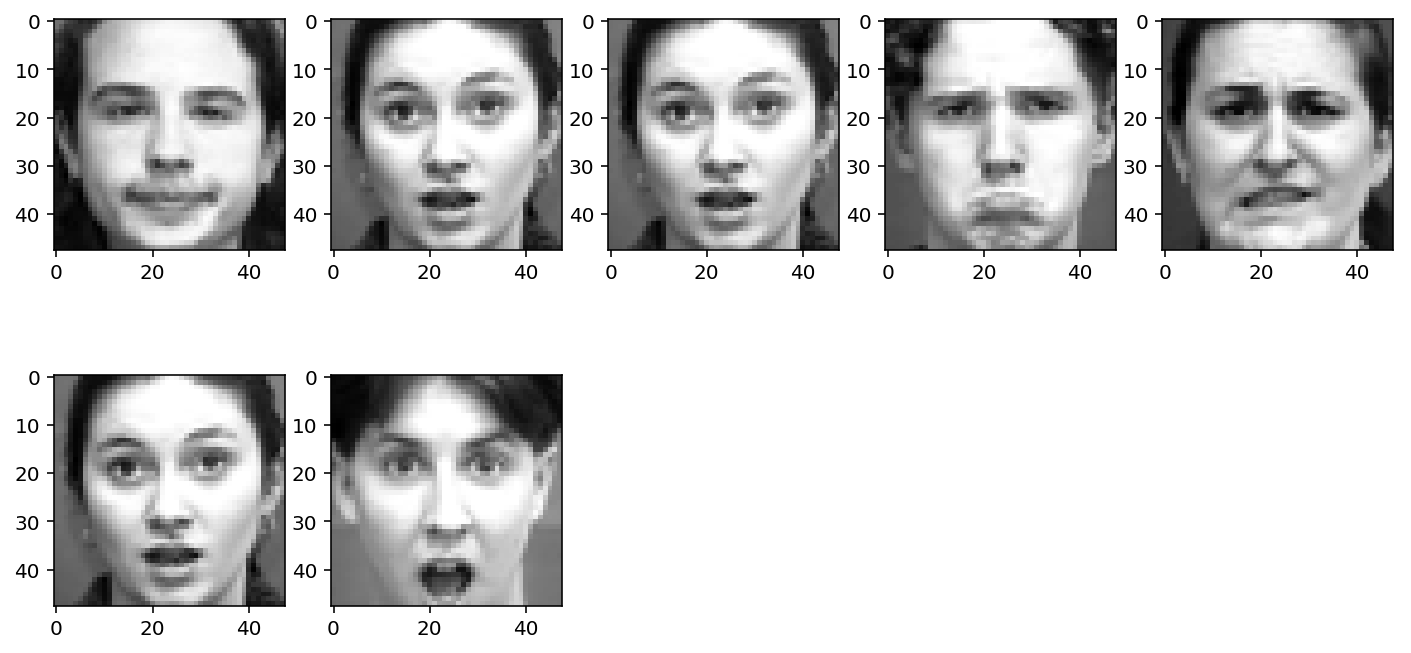

In [6]:
import random
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(12, 6))
for i in range(7):
    random_index = random.randint(0, 6)
    plt.subplot(2, 5, i+1)
    plt.imshow(X[random_index][:,:,::-1].reshape(48,48),cmap = 'gray')
   # plt.title(num_to_class[y[random_index].argmax()])

In [10]:
X_train=X[:-50]
X_test=X[-50:]
Y_train=y[:-50]
Y_test=y[-50:]

In [14]:


X_train.shape


(931, 48, 48, 1)

In [15]:
X


array([[[[7.45098039e-02],
         [7.05882353e-02],
         [9.41176471e-02],
         ...,
         [4.94117647e-01],
         [4.98039216e-01],
         [4.90196078e-01]],

        [[5.09803922e-02],
         [5.49019608e-02],
         [8.62745098e-02],
         ...,
         [4.98039216e-01],
         [5.01960784e-01],
         [4.94117647e-01]],

        [[4.70588235e-02],
         [5.49019608e-02],
         [8.23529412e-02],
         ...,
         [4.94117647e-01],
         [4.98039216e-01],
         [5.01960784e-01]],

        ...,

        [[2.90196078e-01],
         [2.98039216e-01],
         [3.01960784e-01],
         ...,
         [3.92156863e-01],
         [3.84313725e-01],
         [3.80392157e-01]],

        [[2.86274510e-01],
         [2.90196078e-01],
         [2.94117647e-01],
         ...,
         [3.72549020e-01],
         [3.72549020e-01],
         [3.72549020e-01]],

        [[2.78431373e-01],
         [2.82352941e-01],
         [2.90196078e-01],
         ...,
 

In [16]:
X_test.shape

(50, 48, 48, 1)

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.optimizers import SGD

Using TensorFlow backend.


In [14]:
model = Sequential()
model.add(Conv2D(32, (1, 1),activation='relu',input_shape=(48,48,1)))   #Adding Convolution Layer
model.add(Conv2D(32,(1,1),activation='relu'))                           #Adding Another Layer
model.add(MaxPooling2D(pool_size=(2,2)))                                #Perform MaxPooling
model.add(Dropout(0.10))  

model.add(Conv2D(64,(1,1),activation='relu'))
model.add(Conv2D(64,(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(1,1),activation='relu'))
model.add(Conv2D(64,(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(200,activation='relu'))          #Hidden Layer(contains 200 Nodes)
model.add(Dropout(0.1))                          #Assigning Equal weight to Node
model.add(Dense(7,activation='softmax'))         
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.6, nesterov=True)  #Stochastic Gradient Descent
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

In [11]:
model.fit(X_train, Y_train, batch_size=8, epochs=10)

Epoch 1/10
931/931 [==============================] - ETA: 4:18 - loss: 1.9417 - acc: 0.250 - ETA: 2:32 - loss: 1.9278 - acc: 0.312 - ETA: 1:55 - loss: 1.9305 - acc: 0.291 - ETA: 1:37 - loss: 1.9279 - acc: 0.312 - ETA: 1:36 - loss: 1.9166 - acc: 0.350 - ETA: 1:27 - loss: 1.9276 - acc: 0.291 - ETA: 1:21 - loss: 1.9298 - acc: 0.285 - ETA: 1:16 - loss: 1.9349 - acc: 0.250 - ETA: 1:12 - loss: 1.9394 - acc: 0.222 - ETA: 1:09 - loss: 1.9380 - acc: 0.225 - ETA: 1:05 - loss: 1.9366 - acc: 0.227 - ETA: 1:03 - loss: 1.9300 - acc: 0.260 - ETA: 1:02 - loss: 1.9326 - acc: 0.240 - ETA: 1:01 - loss: 1.9361 - acc: 0.223 - ETA: 59s - loss: 1.9345 - acc: 0.225 - ETA: 59s - loss: 1.9351 - acc: 0.21 - ETA: 57s - loss: 1.9335 - acc: 0.22 - ETA: 56s - loss: 1.9345 - acc: 0.20 - ETA: 55s - loss: 1.9308 - acc: 0.21 - ETA: 56s - loss: 1.9312 - acc: 0.21 - ETA: 54s - loss: 1.9297 - acc: 0.21 - ETA: 54s - loss: 1.9269 - acc: 0.22 - ETA: 53s - loss: 1.9243 - acc: 0.22 - ETA: 52s - loss: 1.9247 - acc: 0.21 - ETA: 

931/931 [==============================] - ETA: 59s - loss: 1.8868 - acc: 0.12 - ETA: 52s - loss: 1.9034 - acc: 0.12 - ETA: 55s - loss: 1.7700 - acc: 0.33 - ETA: 52s - loss: 1.7327 - acc: 0.28 - ETA: 52s - loss: 1.7043 - acc: 0.32 - ETA: 53s - loss: 1.6578 - acc: 0.33 - ETA: 53s - loss: 1.7448 - acc: 0.30 - ETA: 52s - loss: 1.7395 - acc: 0.31 - ETA: 51s - loss: 1.7305 - acc: 0.31 - ETA: 51s - loss: 1.7784 - acc: 0.30 - ETA: 54s - loss: 1.7897 - acc: 0.30 - ETA: 53s - loss: 1.7998 - acc: 0.30 - ETA: 52s - loss: 1.7964 - acc: 0.30 - ETA: 52s - loss: 1.7887 - acc: 0.31 - ETA: 53s - loss: 1.7776 - acc: 0.29 - ETA: 53s - loss: 1.7978 - acc: 0.29 - ETA: 53s - loss: 1.8134 - acc: 0.28 - ETA: 53s - loss: 1.8279 - acc: 0.27 - ETA: 51s - loss: 1.8237 - acc: 0.28 - ETA: 51s - loss: 1.8149 - acc: 0.28 - ETA: 51s - loss: 1.8133 - acc: 0.28 - ETA: 51s - loss: 1.8125 - acc: 0.28 - ETA: 50s - loss: 1.8030 - acc: 0.28 - ETA: 49s - loss: 1.8078 - acc: 0.27 - ETA: 48s - loss: 1.8070 - acc: 0.27 - ETA: 48

931/931 [==============================] - ETA: 48s - loss: 1.9638 - acc: 0.0000e+ - ETA: 53s - loss: 1.9405 - acc: 0.0625   - ETA: 1:05 - loss: 1.8455 - acc: 0.208 - ETA: 1:03 - loss: 1.8337 - acc: 0.250 - ETA: 59s - loss: 1.8055 - acc: 0.250 - ETA: 57s - loss: 1.8279 - acc: 0.25 - ETA: 1:02 - loss: 1.8135 - acc: 0.267 - ETA: 1:00 - loss: 1.8197 - acc: 0.265 - ETA: 58s - loss: 1.8339 - acc: 0.250 - ETA: 58s - loss: 1.8245 - acc: 0.26 - ETA: 58s - loss: 1.8338 - acc: 0.27 - ETA: 57s - loss: 1.8332 - acc: 0.28 - ETA: 56s - loss: 1.8238 - acc: 0.28 - ETA: 57s - loss: 1.8154 - acc: 0.29 - ETA: 56s - loss: 1.7938 - acc: 0.32 - ETA: 56s - loss: 1.7856 - acc: 0.32 - ETA: 54s - loss: 1.7944 - acc: 0.30 - ETA: 54s - loss: 1.8038 - acc: 0.29 - ETA: 53s - loss: 1.8015 - acc: 0.28 - ETA: 54s - loss: 1.8114 - acc: 0.28 - ETA: 53s - loss: 1.8296 - acc: 0.26 - ETA: 52s - loss: 1.8260 - acc: 0.26 - ETA: 52s - loss: 1.8248 - acc: 0.26 - ETA: 51s - loss: 1.8280 - acc: 0.26 - ETA: 50s - loss: 1.8226 - a

931/931 [==============================] - ETA: 44s - loss: 1.4841 - acc: 0.37 - ETA: 49s - loss: 1.5999 - acc: 0.37 - ETA: 1:00 - loss: 1.5687 - acc: 0.458 - ETA: 56s - loss: 1.7636 - acc: 0.375 - ETA: 55s - loss: 1.7188 - acc: 0.40 - ETA: 55s - loss: 1.7113 - acc: 0.37 - ETA: 54s - loss: 1.6847 - acc: 0.37 - ETA: 53s - loss: 1.6674 - acc: 0.40 - ETA: 53s - loss: 1.6849 - acc: 0.38 - ETA: 55s - loss: 1.7590 - acc: 0.35 - ETA: 54s - loss: 1.7432 - acc: 0.35 - ETA: 53s - loss: 1.7690 - acc: 0.33 - ETA: 52s - loss: 1.7647 - acc: 0.32 - ETA: 54s - loss: 1.7684 - acc: 0.31 - ETA: 53s - loss: 1.7625 - acc: 0.30 - ETA: 52s - loss: 1.7662 - acc: 0.31 - ETA: 51s - loss: 1.7495 - acc: 0.33 - ETA: 50s - loss: 1.7484 - acc: 0.34 - ETA: 50s - loss: 1.7358 - acc: 0.33 - ETA: 49s - loss: 1.7505 - acc: 0.32 - ETA: 50s - loss: 1.7414 - acc: 0.33 - ETA: 49s - loss: 1.7372 - acc: 0.33 - ETA: 48s - loss: 1.7347 - acc: 0.34 - ETA: 47s - loss: 1.7429 - acc: 0.33 - ETA: 48s - loss: 1.7452 - acc: 0.32 - ETA:

931/931 [==============================] - ETA: 48s - loss: 1.6856 - acc: 0.25 - ETA: 49s - loss: 1.6329 - acc: 0.31 - ETA: 48s - loss: 1.6061 - acc: 0.37 - ETA: 58s - loss: 1.6526 - acc: 0.37 - ETA: 55s - loss: 1.6327 - acc: 0.37 - ETA: 53s - loss: 1.6202 - acc: 0.33 - ETA: 52s - loss: 1.6397 - acc: 0.32 - ETA: 52s - loss: 1.6913 - acc: 0.29 - ETA: 51s - loss: 1.6535 - acc: 0.29 - ETA: 51s - loss: 1.6116 - acc: 0.33 - ETA: 50s - loss: 1.5681 - acc: 0.36 - ETA: 51s - loss: 1.5796 - acc: 0.37 - ETA: 50s - loss: 1.6102 - acc: 0.37 - ETA: 49s - loss: 1.6202 - acc: 0.37 - ETA: 51s - loss: 1.6005 - acc: 0.38 - ETA: 50s - loss: 1.6172 - acc: 0.36 - ETA: 49s - loss: 1.5886 - acc: 0.38 - ETA: 49s - loss: 1.5723 - acc: 0.40 - ETA: 49s - loss: 1.5821 - acc: 0.40 - ETA: 48s - loss: 1.6008 - acc: 0.40 - ETA: 47s - loss: 1.5986 - acc: 0.39 - ETA: 48s - loss: 1.6264 - acc: 0.38 - ETA: 47s - loss: 1.6218 - acc: 0.38 - ETA: 46s - loss: 1.6246 - acc: 0.38 - ETA: 45s - loss: 1.6287 - acc: 0.37 - ETA: 46

In [12]:
pred  = model.predict(X_test)
(pred[0])

array([0.03429792, 0.03019179, 0.02529999, 0.4173176 , 0.43708387,
       0.01059435, 0.04521452], dtype=float32)

In [13]:
model.evaluate(X_test,Y_test)

50/50 [==============================] - ETA:  - 0s 3ms/step


[1.5654087257385254, 0.44000000357627866]

In [36]:
e = {0:'anger',1:'contempt',2:'disgut',3:'fear',4:'happy',5:'sadness',6:'surprise'}

In [22]:
e

{0: 'anger',
 1: 'contempt',
 2: 'disgut',
 3: 'fear',
 4: 'happy',
 5: 'sadness',
 6: 'surprise'}

In [23]:
'''for i in range(len(pred)):
    for j in range(0,7):
        for k in range(0,j):
            if(int(pred[j][k]) == 0):
                print('anger')
            elif(int(pred[j][k] == 1)):
                print('contempt')
            elif(int(pred[j][k] == 2)):
                print('disgust')
            elif(int(pred[j][k] == 3)):
                print('fear')
            elif(int(pred[j][k] == 4)):
                print('happy')
            elif(int(pred[j][k] == 5)):
                print('sadness')
            elif(int(pred[j][k] == 6)):
                print('surprise')
            else:
                print('Netral')'''
            

"for i in range(len(pred)):\n    for j in range(0,7):\n        for k in range(0,j):\n            if(int(pred[j][k]) == 0):\n                print('anger')\n            elif(int(pred[j][k] == 1)):\n                print('contempt')\n            elif(int(pred[j][k] == 2)):\n                print('disgust')\n            elif(int(pred[j][k] == 3)):\n                print('fear')\n            elif(int(pred[j][k] == 4)):\n                print('happy')\n            elif(int(pred[j][k] == 5)):\n                print('sadness')\n            elif(int(pred[j][k] == 6)):\n                print('surprise')\n            else:\n                print('Netral')"

In [37]:
pred

array([[1.24733743e-08, 1.00435261e-06, 1.14898395e-03, 1.15785909e-07,
        9.98849869e-01, 3.20863136e-09, 7.32540362e-10],
       [6.82066202e-01, 1.50943492e-02, 1.79946601e-01, 3.97152686e-03,
        8.21891648e-04, 1.14800766e-01, 3.29859601e-03],
       [1.84423067e-02, 1.47969211e-02, 1.66829348e-01, 2.40860647e-03,
        7.27053557e-04, 1.32714249e-02, 7.83524334e-01],
       [3.45784961e-03, 4.00167376e-01, 2.38311023e-01, 4.90513705e-02,
        2.84556121e-01, 4.40234668e-04, 2.40160022e-02],
       [9.65821505e-01, 1.13192400e-04, 2.34463625e-02, 8.05921786e-07,
        2.05024353e-08, 1.06103467e-02, 7.67951497e-06],
       [4.32776229e-04, 8.78644350e-05, 1.96744790e-04, 1.90974401e-06,
        2.22227161e-08, 2.60575768e-03, 9.96674895e-01],
       [7.22248330e-07, 8.86427370e-05, 9.56481497e-04, 1.40372813e-05,
        9.98940051e-01, 1.07717968e-08, 7.19062427e-08],
       [4.51886468e-03, 1.84615710e-05, 9.95428205e-01, 1.17718155e-08,
        4.22485982e-07, 3

In [39]:
import matplotlib.pyplot as plt

In [47]:
for i in range(0,50):
    if(np.argmax((pred[i])) == 0):
            print(i,'anger')
    elif((np.argmax(pred[i]) == 1)):
            print(i,'contempt')
    elif((np.argmax(pred[i]) == 2)):
            print(i,'disgust')
    elif((np.argmax(pred[i]) == 3)):
            print(i,'fear')
    elif((np.argmax(pred[i]) == 4)):
            print(i,'happy')
    elif((np.argmax(pred[i]) == 5)):
            print(i,'sadness')
    elif((np.argmax(pred[i]) == 6)):
            print(i,'surprise')
    else:
            print('Netral')


0 happy
1 anger
2 surprise
3 contempt
4 anger
5 surprise
6 happy
7 disgust
8 surprise
9 surprise
10 disgust
11 happy
12 surprise
13 anger
14 surprise
15 surprise
16 anger
17 disgust
18 surprise
19 happy
20 anger
21 sadness
22 happy
23 anger
24 sadness
25 disgust
26 happy
27 surprise
28 happy
29 anger
30 disgust
31 surprise
32 disgust
33 disgust
34 disgust
35 anger
36 disgust
37 happy
38 surprise
39 happy
40 anger
41 surprise
42 surprise
43 anger
44 contempt
45 happy
46 disgust
47 sadness
48 disgust
49 sadness


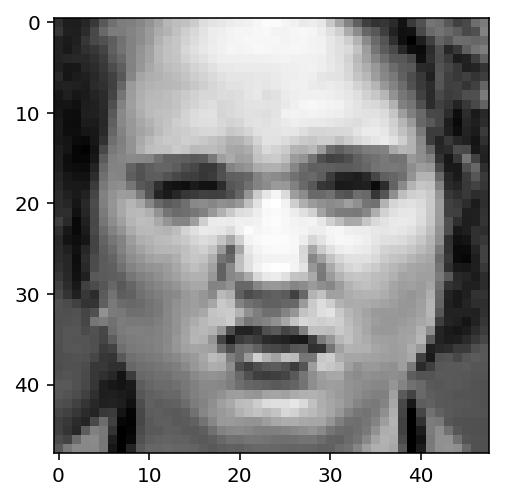

In [48]:
plt.imshow(X_test[36].reshape(48,48),cmap='gray')


In [76]:
X_train[0].shape

(48, 48, 1)

In [128]:
model.save('emotion.h5')